In [53]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
import pickle
import ast
from collections import Counter
from itertools import chain
from collections import Counter
import seaborn as sns
import joblib
from scipy import interp
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import liwc
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import itertools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Word2Vec
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [2]:
liwcPath = r'LIWC2015 Dictionary.dic'
parse, category_names = liwc.load_token_parser(liwcPath)

# read csv 

In [85]:
import pandas as pd
df=pd.read_csv(r'Fake and real news dataset\Fake.csv')
df['Class']=1
#df1=pd.read_csv(r'Fake News\train.csv')
#df2=pd.read_csv(r'Fake News\test.csv')
#df3=pd.read_csv(r'Fake News detection\data.csv')
df4=pd.read_csv(r'Fake and real news dataset\True.csv')
df4['Class']=0

# processing data

In [86]:
df_fake_ds=pd.concat([df,df4]).drop(['title','subject','date'],axis=1)

In [5]:
df_fake1_ds=df1.drop(['id','title','author'],axis=1).rename({'label':'Label'},axis=1)

NameError: name 'df1' is not defined

In [6]:
df_fake2_ds=df3.drop(['URLs','Headline'],axis=1).rename({'Body':'text'},axis=1)

NameError: name 'df3' is not defined

In [87]:
fake_news_Df=pd.concat([df_fake_ds,df_fake1_ds,df_fake2_ds])

In [88]:
fake_news_Df

,text,Class
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [89]:
fake_news_Df = fake_news_Df.dropna()
fake_news_Df.reset_index(inplace = True)

In [90]:
fake_news_Df

,index,text,Class
0,0,Donald Trump just couldn t wish all Americans ...,1
1,1,House Intelligence Committee Chairman Devin Nu...,1
2,2,"On Friday, it was revealed that former Milwauk...",1
3,3,"On Christmas day, Donald Trump announced that ...",1
4,4,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44893,21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,21413,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,21414,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,21415,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [91]:
def clean_train_data(x):
    text = x
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # remove square brackets
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\n', '', text)
    return text

In [92]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : clean_train_data(x))

### Stopword Removal

In [93]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [94]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [95]:
fake_news_Df['text'] = fake_news_Df.text.apply(lambda x : remove_eng_stopwords(x))

In [96]:
fake_news_Df['text']

0        donald trump wish americans happy new year lea...
1        house intelligence committee chairman devin nu...
2        friday revealed former milwaukee sheriff david...
3        christmas day donald trump announced would bac...
4        pope francis used annual christmas day message...
                               ...                        
44893    brussels reuters nato allies tuesday welcomed ...
44894    london reuters lexisnexis provider legal regul...
44895    minsk reuters shadow disused sovietera factori...
44896    moscow reuters vatican secretary state cardina...
44897    jakarta reuters indonesia buy sukhoi fighter j...
Name: text, Length: 44898, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

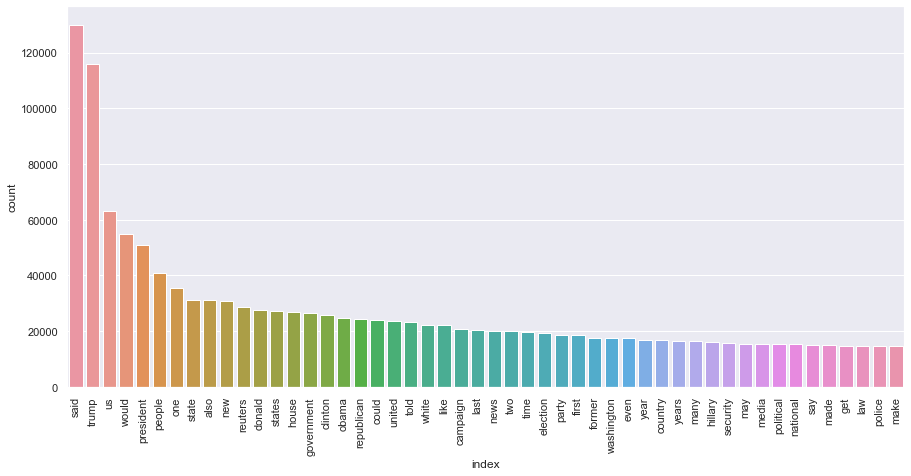

In [97]:
list_words = fake_news_Df['text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=90)

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
lemm = WordNetLemmatizer()
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

In [98]:
corpus = []
words = []
for i in range(0,len(fake_news_Df)):
    review = re.sub('[^a-zA-Z0-9]',' ',fake_news_Df['text'][i])
    review = review.lower()
    review = review.split()
    review = list(Counter(category for token in review for category in parse(token)))
    statements = ' '.join(review)
    corpus.append(statements)
    words.append(review)

In [101]:
count_test = CountVectorizer().fit(corpus)
X_test_count = count_test.fit_transform(corpus).toarray()

In [103]:
x=X_test_count

In [104]:
y=fake_news_Df.Class.values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [106]:
X_train

array([[1, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]], dtype=int64)

In [107]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['NN']=MLPClassifier()
    models['RF']=RandomForestClassifier()
    return models

In [ ]:

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result=model.score(X_test, y_test)
    results.append(result)
    names.append(name)
    filename = '{}_model.sav'.format(name)
    joblib.dump(model, filename)
    print('classification name is',name)
    
    
print(names)
print(results)

classification name is lr


In [267]:
#----------troll------------
print('----------troll------------')
models = get_models()

X['Labels']=1
x= X.drop(['Labels'],axis=1)
y= X.Labels.values

for name, model in models.items():
    

    filename = '{}_model.sav'.format(name)
    # load the model from disk
    loaded_model = joblib.load(filename)

    result = loaded_model.score(x,y)
    print('{} non-scaled: '.format(name),round(result,2))

    print('--------------------------------')


----------troll------------
lr non-scaled:  0.59
--------------------------------
knn non-scaled:  0.45
--------------------------------
cart non-scaled:  0.32
--------------------------------
svm non-scaled:  0.66
--------------------------------
NN non-scaled:  0.6
--------------------------------
RF non-scaled:  0.32
--------------------------------


In [268]:
#----------troll------------
print('----------troll------------')
models = get_models()

X['Labels']=0
x= X.drop(['Labels'],axis=1)
y= X.Labels.values

for name, model in models.items():
    

    filename = '{}_model.sav'.format(name)
    # load the model from disk
    loaded_model = joblib.load(filename)

    result = loaded_model.score(x,y)
    print('{} non-scaled: '.format(name),round(result,2))

    print('--------------------------------')


----------troll------------
lr non-scaled:  0.41
--------------------------------
knn non-scaled:  0.55
--------------------------------
cart non-scaled:  0.68
--------------------------------
svm non-scaled:  0.34
--------------------------------
NN non-scaled:  0.4
--------------------------------
RF non-scaled:  0.68
--------------------------------
